In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [2]:
courses = [] 
comp=[]
rat=[]
revi=[]
cred=[]
time=[]
typ=[]
skill=[]
for x in range(1,84):
    urls="https://www.coursera.org/search?query=data+science&page="+str(x)
    print(urls)
    page=requests.get(urls)
    soup=BeautifulSoup(page.text)
    
    
    co=soup.find_all("h2",class_="cds-119 css-h1jogs cds-121")
    if len(co)!=12:
        for x in range(0,12):
            courses.append("None")
    else:
        for i in co:
            courses.append(i.text)
            
    com=soup.find_all("span",class_="cds-119 css-1mru19s cds-121")
    
    if len(com)!=12:
        for x in range(0,12):
            comp.append("None")
    else:
        for i in com:
            comp.append(i.text)



    bl=soup.findAll('div', attrs={'aria-hidden':'true', 'class':"css-ilhc4l"})
    
    if len(bl)!=12:
        for x in range(0,12):
            rat.append("None")
            revi.append("None")
            cred.append("None")
    else:
        
        for con in bl:
            if len(con.find_all("p"))<2:
                rat.append("None")
                  
            else:
                rat.append(con.find_all("p")[1].text)
        for cos in bl:
            if len(cos.find_all("p"))<3:
                revi.append("None")
            else:
                revi.append(cos.find_all("p")[2].text)
        for con in bl:
            if con.find_all("p")[-1].text=="Credit Eligible":
                
                cred.append(con.find_all("p")[-1].text)
            else:
                cred.append("Not specified")
            
            

    


    a=soup.find_all("li",class_="cds-9 css-0 cds-11 cds-grid-item cds-56 cds-64 cds-76")
    if len(a)==12:
        for k in range(0,12):
            aa=soup.find_all("li",class_="cds-9 css-0 cds-11 cds-grid-item cds-56 cds-64 cds-76")[k].text[-70:-1]
            cc=aa.split("·")
            time.append(cc[-1])
            typ.append(cc[-2].replace(" Â",""))
    else:
        for k in range(0,12):
            time.append("None")
            typ.append("None")

    
    d=soup.find_all("p",class_="cds-119 css-12ksubz cds-121")
    
    if len(d)<12:
        for x in range(0,12):
            skill.append("None")
    else:
        for x in d:
            new=x.text
            b=new.replace("Skills you'll gain:","")
            
            
            skill.append(b)
            
        



    print(len(rat))
    print(len(revi))
    print(len(cred))
    print(len(time))
    print(len(typ))
    print(len(skill))
    print(len(courses))
    print(len(comp))
    
print("Done")

https://www.coursera.org/search?query=data+science&page=1
12
12
12
12
12
12
12
12
https://www.coursera.org/search?query=data+science&page=2
24
24
24
24
24
24
24
24
https://www.coursera.org/search?query=data+science&page=3
36
36
36
36
36
36
36
36
https://www.coursera.org/search?query=data+science&page=4
48
48
48
48
48
48
48
48
https://www.coursera.org/search?query=data+science&page=5
60
60
60
60
60
60
60
60
https://www.coursera.org/search?query=data+science&page=6
72
72
72
72
72
72
72
72
https://www.coursera.org/search?query=data+science&page=7
84
84
84
84
84
84
84
84
https://www.coursera.org/search?query=data+science&page=8
96
96
96
96
96
96
96
96
https://www.coursera.org/search?query=data+science&page=9
108
108
108
108
108
108
108
108
https://www.coursera.org/search?query=data+science&page=10
120
120
120
120
120
120
120
120
https://www.coursera.org/search?query=data+science&page=11
132
132
132
132
132
132
132
132
https://www.coursera.org/search?query=data+science&page=12
144
144
144
1

In [22]:
df1= pd.DataFrame({"Courses":courses,
             "Company":comp,
             "Rating":rat,
             "Reviews":revi,
             "Credits":cred,
             "Time Period":time,
             "Type":typ,
              "Skill":skill})

df1

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
0,"Python for Data Science, AI & Development",IBM,4.6,(32.7k reviews),Not specified,1 - 3 Month,Course,"Data Analysis, Python Programming, Data Struc..."
1,IBM Data Science,IBM,4.6,(114.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Python Programming, Data Science, Data Analys..."
2,What is Data Science?,IBM,4.7,(64.4k reviews),Not specified,1 - 4 Week,Course,"Data Science, Data Mining, Regression, Basic ..."
3,Google Data Analytics,Google,4.8,(123.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Data Analysis, Data Science, Statistical Prog..."
4,Databases and SQL for Data Science with Python,IBM,4.6,(18k reviews),Not specified,1 - 3 Month,Course,"SQL, Databases, Database Theory, Data Managem..."
...,...,...,...,...,...,...,...,...
991,Exploratory Data Analysis,Coursera Project Network,4.2,(141 reviews),Not specified,Less Than 2 Hour,Guided Project,"Basic Descriptive Statistics, Business Analys..."
992,AnÃ¡lisis de datos con programaciÃ³n en R,Google,4.7,(223 reviews),Not specified,1 - 3 Month,Course,"R Programming, Statistical Programming, Compu..."
993,Python for Beginners: Variables and Strings,Coursera Project Network,Beginner Â· Guided Project Â· Less Than 2 Hours,None,Not specified,Less Than 2 Hour,Guided Project,"Computer Programming, Python Programming, Sta..."
994,Prediction Models with Sports Data,University of Michigan,4.5,(27 reviews),Not specified,1 - 3 Month,Course,"Business Analysis, Data Analysis, Probability..."


In [4]:
df3.loc[(df3["Courses"]=="None") | (df3["Company"]=="None")| (df3["Rating"]=="None") |(df3["Reviews"]=="None") | (df3["Credits"]=="None") | (df3["Time Period"]=="None") |  (df3["Type"]=="None") |  (df3["Skill"]=="None") ]

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
12,Master of Science in Machine Learning and Data...,Imperial College London,,Credit Eligible,Credit Eligible,24 month,arning and Data ScienceEarn a degreeCredit Eli...,None
13,Data Science Math Skills,Duke University,4.5,(11.3k reviews),Not specified,1 - 3 Month,Course,None
14,A Crash Course in Data Science,Johns Hopkins University,4.5,(8.1k reviews),Not specified,1 - 4 Week,Course,None
15,IBM Machine Learning,IBM,4.6,(1.7k reviews),Not specified,3 - 6 Month,Professional Certificate,None
16,Advanced Data Science with IBM,IBM,4.3,(3k reviews),Not specified,3 - 6 Month,Specialization,None
...,...,...,...,...,...,...,...,...
982,Digital Marketing Analytics in Theory,University of Illinois at Urbana-Champaign,4.5,(4.7k reviews),Not specified,1 - 4 Week,Course,None
983,Inferential Statistics,University of Amsterdam,4.4,(573 reviews),Not specified,1 - 3 Month,Course,None
984,Fragen FÃ¼r Eine Datengesteuerte Entscheidungs...,Google,Beginner Â· Course Â· 1 - 4 Weeks,None,Not specified,1 - 4 Week,Course,"Communication, Data Analysis, Project Managem..."
989,Interactive Geospatial Visualization:Kepler GL...,Coursera Project Network,Intermediate Â· Guided Project Â· Less Than 2 ...,None,Not specified,Less Than 2 Hour,Guided Project,"Data Visualization, Geovisualization, Python ..."


In [9]:
df3.to_excel("coursera.xlsx", index=False)

In [17]:
df3.loc[0:50,["Courses","Company","Rating","Reviews","Credits","Time Period","Type"]]

,Courses,Company,Rating,Reviews,Credits,Time Period,Type
0,"Python for Data Science, AI & Development",IBM,4.6,(32.7k reviews),Not specified,1 - 3 Month,Course
1,IBM Data Science,IBM,4.6,(114.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate
2,What is Data Science?,IBM,4.7,(64.4k reviews),Not specified,1 - 4 Week,Course
3,Google Data Analytics,Google,4.8,(123.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate
4,Databases and SQL for Data Science with Python,IBM,4.6,(18k reviews),Not specified,1 - 3 Month,Course
5,Data Science Methodology,IBM,4.6,(19.3k reviews),Not specified,1 - 4 Week,Course
6,Introduction to Data Science,IBM,4.6,(82.3k reviews),Credit Eligible,3 - 6 Month,Specialization
7,Foundations of Data Science,Google,4.7,(817 reviews),Not specified,1 - 3 Month,Course
8,Applied Data Science with Python,University of Michigan,4.5,(33.3k reviews),Not specified,3 - 6 Month,Specialization
9,Data Science,Johns Hopkins University,4.5,(50.2k reviews),Not specified,3 - 6 Month,Specialization


In [20]:
Project="df3.xlsx"
# saving the excel 
df3.to_excel(Project)

In [21]:
df3.to_excel("coursera.xlsx", index=False)

'df3.xlsx'

In [24]:
df1.to_excel("Project.xlsx", index=False)

In [25]:
Project

'df3.xlsx'

In [27]:
df1.to_excel(r"C:\Users\Lenovo\Downloads\San.xlsx",index=False)

In [2]:
san=pd.read_excel(r"C:\Users\Lenovo\Downloads\San.xlsx")

In [17]:
pp=pd.read_excle(r"C:\Users\Lenovo\Downloads\SS.Excel")

AttributeError: module 'pandas' has no attribute 'read_excle'

In [4]:
san

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
0,"Python for Data Science, AI & Development",IBM,4.6,(32.7k reviews),Not specified,1 - 3 Month,Course,"Data Analysis, Python Programming, Data Struc..."
1,IBM Data Science,IBM,4.6,(114.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Python Programming, Data Science, Data Analys..."
2,What is Data Science?,IBM,4.7,(64.4k reviews),Not specified,1 - 4 Week,Course,"Data Science, Data Mining, Regression, Basic ..."
3,Google Data Analytics,Google,4.8,(123.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Data Analysis, Data Science, Statistical Prog..."
4,Databases and SQL for Data Science with Python,IBM,4.6,(18k reviews),Not specified,1 - 3 Month,Course,"SQL, Databases, Database Theory, Data Managem..."
...,...,...,...,...,...,...,...,...
991,Exploratory Data Analysis,Coursera Project Network,4.2,(141 reviews),Not specified,Less Than 2 Hour,Guided Project,"Basic Descriptive Statistics, Business Analys..."
992,AnÃ¡lisis de datos con programaciÃ³n en R,Google,4.7,(223 reviews),Not specified,1 - 3 Month,Course,"R Programming, Statistical Programming, Compu..."
993,Python for Beginners: Variables and Strings,Coursera Project Network,Beginner Â· Guided Project Â· Less Than 2 Hours,None,Not specified,Less Than 2 Hour,Guided Project,"Computer Programming, Python Programming, Sta..."
994,Prediction Models with Sports Data,University of Michigan,4.5,(27 reviews),Not specified,1 - 3 Month,Course,"Business Analysis, Data Analysis, Probability..."


In [5]:
san.isnull().sum()

Courses         0
Company         0
Rating         11
Reviews         5
Credits         0
Time Period     0
Type            0
Skill           0
dtype: int64

In [3]:
san.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Courses      996 non-null    object
 1   Company      996 non-null    object
 2   Rating       985 non-null    object
 3   Reviews      991 non-null    object
 4   Credits      996 non-null    object
 5   Time Period  996 non-null    object
 6   Type         996 non-null    object
 7   Skill        996 non-null    object
dtypes: object(8)
memory usage: 62.4+ KB


In [4]:
san.describe()

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
count,996,996,985,991,996,996,996,996
unique,485,85,40,281,3,12,24,362
top,None,None,None,None,Not specified,1 - 3 Month,Course,None
freq,456,456,471,548,509,289,531,600


In [6]:
san.dropna(subset=["Rating"],inplace=True)

In [7]:
san.dropna(subset=["Reviews"],inplace=True)

In [8]:
san = san.reset_index(drop=True)

In [9]:
san

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
0,"Python for Data Science, AI & Development",IBM,4.6,(32.7k reviews),Not specified,1 - 3 Month,Course,"Data Analysis, Python Programming, Data Struc..."
1,IBM Data Science,IBM,4.6,(114.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Python Programming, Data Science, Data Analys..."
2,What is Data Science?,IBM,4.7,(64.4k reviews),Not specified,1 - 4 Week,Course,"Data Science, Data Mining, Regression, Basic ..."
3,Google Data Analytics,Google,4.8,(123.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Data Analysis, Data Science, Statistical Prog..."
4,Databases and SQL for Data Science with Python,IBM,4.6,(18k reviews),Not specified,1 - 3 Month,Course,"SQL, Databases, Database Theory, Data Managem..."
...,...,...,...,...,...,...,...,...
975,Exploratory Data Analysis,Coursera Project Network,4.2,(141 reviews),Not specified,Less Than 2 Hour,Guided Project,"Basic Descriptive Statistics, Business Analys..."
976,AnÃ¡lisis de datos con programaciÃ³n en R,Google,4.7,(223 reviews),Not specified,1 - 3 Month,Course,"R Programming, Statistical Programming, Compu..."
977,Python for Beginners: Variables and Strings,Coursera Project Network,Beginner Â· Guided Project Â· Less Than 2 Hours,None,Not specified,Less Than 2 Hour,Guided Project,"Computer Programming, Python Programming, Sta..."
978,Prediction Models with Sports Data,University of Michigan,4.5,(27 reviews),Not specified,1 - 3 Month,Course,"Business Analysis, Data Analysis, Probability..."


In [12]:
revi=[]
for x in san["Reviews"]:
    
    x=x.rstrip(" reviews)")
    x=x.lstrip("(")
    
    
    if "k" in x:
        x=x.rstrip("k")
        k=float(k)
        k=k*1000
        k=int(k)
        revi.append(k)
    else:
        revi.append(int(k))
    

OverflowError: cannot convert float infinity to integer

In [19]:
revi=[]
for x in san["Reviews"]:
     x=x.rstrip(" reviews)")
     x=x.lstrip("(")

In [20]:
x

'243'

In [22]:
revi=[]
for x in san["Reviews"]:
    
    x=x.rstrip(" reviews)")
    x=x.lstrip("(")
    
    
    if "k" in x:
        x=x.rstrip("k")
        k=float(x)
        k=k*1000
        k=int(k)
        revi.append(k)
    else:
        revi.append(int(x))

ValueError: invalid literal for int() with base 10: 'Non'

In [27]:
drp=san.loc[(san["Courses"]=="None") | (san["Company"]=="None")| (san["Rating"]=="None") |(san["Reviews"]=="None") | (san["Credits"]=="None") | (san["Time Period"]=="None") |  (san["Type"]=="None") |  (san["Skill"]=="None") ]

In [28]:
drp

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
12,Data Science Math Skills,Duke University,4.5,(11.3k reviews),Not specified,1 - 3 Month,Course,None
13,A Crash Course in Data Science,Johns Hopkins University,4.5,(8.1k reviews),Not specified,1 - 4 Week,Course,None
14,IBM Machine Learning,IBM,4.6,(1.7k reviews),Not specified,3 - 6 Month,Professional Certificate,None
15,Advanced Data Science with IBM,IBM,4.3,(3k reviews),Not specified,3 - 6 Month,Specialization,None
16,Executive Data Science,Johns Hopkins University,4.5,(10.8k reviews),Not specified,1 - 3 Month,Specialization,None
...,...,...,...,...,...,...,...,...
966,Digital Marketing Analytics in Theory,University of Illinois at Urbana-Champaign,4.5,(4.7k reviews),Not specified,1 - 4 Week,Course,None
967,Inferential Statistics,University of Amsterdam,4.4,(573 reviews),Not specified,1 - 3 Month,Course,None
968,Fragen FÃ¼r Eine Datengesteuerte Entscheidungs...,Google,Beginner Â· Course Â· 1 - 4 Weeks,None,Not specified,1 - 4 Week,Course,"Communication, Data Analysis, Project Managem..."
973,Interactive Geospatial Visualization:Kepler GL...,Coursera Project Network,Intermediate Â· Guided Project Â· Less Than 2 ...,None,Not specified,Less Than 2 Hour,Guided Project,"Data Visualization, Geovisualization, Python ..."


In [29]:
final =san.drop(drp.index)

In [30]:
finalp

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
0,"Python for Data Science, AI & Development",IBM,4.6,(32.7k reviews),Not specified,1 - 3 Month,Course,"Data Analysis, Python Programming, Data Struc..."
1,IBM Data Science,IBM,4.6,(114.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Python Programming, Data Science, Data Analys..."
2,What is Data Science?,IBM,4.7,(64.4k reviews),Not specified,1 - 4 Week,Course,"Data Science, Data Mining, Regression, Basic ..."
3,Google Data Analytics,Google,4.8,(123.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Data Analysis, Data Science, Statistical Prog..."
4,Databases and SQL for Data Science with Python,IBM,4.6,(18k reviews),Not specified,1 - 3 Month,Course,"SQL, Databases, Database Theory, Data Managem..."
...,...,...,...,...,...,...,...,...
974,Working with BigQuery,Coursera Project Network,4.3,(157 reviews),Not specified,Less Than 2 Hour,Guided Project,"Big Data, Data Management, Data Visualization..."
975,Exploratory Data Analysis,Coursera Project Network,4.2,(141 reviews),Not specified,Less Than 2 Hour,Guided Project,"Basic Descriptive Statistics, Business Analys..."
976,AnÃ¡lisis de datos con programaciÃ³n en R,Google,4.7,(223 reviews),Not specified,1 - 3 Month,Course,"R Programming, Statistical Programming, Compu..."
978,Prediction Models with Sports Data,University of Michigan,4.5,(27 reviews),Not specified,1 - 3 Month,Course,"Business Analysis, Data Analysis, Probability..."


In [31]:
finalp = finalp.reset_index(drop=True)

In [32]:
finalp

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
0,"Python for Data Science, AI & Development",IBM,4.6,(32.7k reviews),Not specified,1 - 3 Month,Course,"Data Analysis, Python Programming, Data Struc..."
1,IBM Data Science,IBM,4.6,(114.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Python Programming, Data Science, Data Analys..."
2,What is Data Science?,IBM,4.7,(64.4k reviews),Not specified,1 - 4 Week,Course,"Data Science, Data Mining, Regression, Basic ..."
3,Google Data Analytics,Google,4.8,(123.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Data Analysis, Data Science, Statistical Prog..."
4,Databases and SQL for Data Science with Python,IBM,4.6,(18k reviews),Not specified,1 - 3 Month,Course,"SQL, Databases, Database Theory, Data Managem..."
...,...,...,...,...,...,...,...,...
347,Working with BigQuery,Coursera Project Network,4.3,(157 reviews),Not specified,Less Than 2 Hour,Guided Project,"Big Data, Data Management, Data Visualization..."
348,Exploratory Data Analysis,Coursera Project Network,4.2,(141 reviews),Not specified,Less Than 2 Hour,Guided Project,"Basic Descriptive Statistics, Business Analys..."
349,AnÃ¡lisis de datos con programaciÃ³n en R,Google,4.7,(223 reviews),Not specified,1 - 3 Month,Course,"R Programming, Statistical Programming, Compu..."
350,Prediction Models with Sports Data,University of Michigan,4.5,(27 reviews),Not specified,1 - 3 Month,Course,"Business Analysis, Data Analysis, Probability..."


In [33]:
revi=[]
for x in finalp["Reviews"]:
    
    x=x.rstrip(" reviews)")
    x=x.lstrip("(")
    
    
    if "k" in x:
        x=x.rstrip("k")
        k=float(x)
        k=k*1000
        k=int(k)
        revi.append(k)
    else:
        revi.append(int(x))

In [35]:
finalp

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
0,"Python for Data Science, AI & Development",IBM,4.6,(32.7k reviews),Not specified,1 - 3 Month,Course,"Data Analysis, Python Programming, Data Struc..."
1,IBM Data Science,IBM,4.6,(114.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Python Programming, Data Science, Data Analys..."
2,What is Data Science?,IBM,4.7,(64.4k reviews),Not specified,1 - 4 Week,Course,"Data Science, Data Mining, Regression, Basic ..."
3,Google Data Analytics,Google,4.8,(123.3k reviews),Credit Eligible,3 - 6 Month,Professional Certificate,"Data Analysis, Data Science, Statistical Prog..."
4,Databases and SQL for Data Science with Python,IBM,4.6,(18k reviews),Not specified,1 - 3 Month,Course,"SQL, Databases, Database Theory, Data Managem..."
...,...,...,...,...,...,...,...,...
347,Working with BigQuery,Coursera Project Network,4.3,(157 reviews),Not specified,Less Than 2 Hour,Guided Project,"Big Data, Data Management, Data Visualization..."
348,Exploratory Data Analysis,Coursera Project Network,4.2,(141 reviews),Not specified,Less Than 2 Hour,Guided Project,"Basic Descriptive Statistics, Business Analys..."
349,AnÃ¡lisis de datos con programaciÃ³n en R,Google,4.7,(223 reviews),Not specified,1 - 3 Month,Course,"R Programming, Statistical Programming, Compu..."
350,Prediction Models with Sports Data,University of Michigan,4.5,(27 reviews),Not specified,1 - 3 Month,Course,"Business Analysis, Data Analysis, Probability..."


In [36]:
finalp.drop(["Reviews"],axis=1,inplace=True)
finalp.insert(3,"Reviews",revi)

In [37]:
finalp

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
0,"Python for Data Science, AI & Development",IBM,4.6,32700,Not specified,1 - 3 Month,Course,"Data Analysis, Python Programming, Data Struc..."
1,IBM Data Science,IBM,4.6,114300,Credit Eligible,3 - 6 Month,Professional Certificate,"Python Programming, Data Science, Data Analys..."
2,What is Data Science?,IBM,4.7,64400,Not specified,1 - 4 Week,Course,"Data Science, Data Mining, Regression, Basic ..."
3,Google Data Analytics,Google,4.8,123300,Credit Eligible,3 - 6 Month,Professional Certificate,"Data Analysis, Data Science, Statistical Prog..."
4,Databases and SQL for Data Science with Python,IBM,4.6,18000,Not specified,1 - 3 Month,Course,"SQL, Databases, Database Theory, Data Managem..."
...,...,...,...,...,...,...,...,...
347,Working with BigQuery,Coursera Project Network,4.3,157,Not specified,Less Than 2 Hour,Guided Project,"Big Data, Data Management, Data Visualization..."
348,Exploratory Data Analysis,Coursera Project Network,4.2,141,Not specified,Less Than 2 Hour,Guided Project,"Basic Descriptive Statistics, Business Analys..."
349,AnÃ¡lisis de datos con programaciÃ³n en R,Google,4.7,223,Not specified,1 - 3 Month,Course,"R Programming, Statistical Programming, Compu..."
350,Prediction Models with Sports Data,University of Michigan,4.5,27,Not specified,1 - 3 Month,Course,"Business Analysis, Data Analysis, Probability..."


In [38]:
finalp.to_excel(r"C:\Users\Lenovo\Downloads\SS.xlsx",index=False)

In [11]:
courses = [] 
comp=[]
rat=[]
revi=[]
cred=[]
time=[]
typ=[]
skill=[]
for x in range(1,84):
    urls="https://www.coursera.org/search?query=machine+learning&page"+str(x)
    print(urls)
    page=requests.get(urls)
    soup=BeautifulSoup(page.text)
    
    
    co=soup.find_all("h2",class_="cds-119 css-h1jogs cds-121")
    if len(co)!=12:
        for x in range(0,12):
            courses.append("None")
    else:
        for i in co:
            courses.append(i.text)
            
    com=soup.find_all("span",class_="cds-119 css-1mru19s cds-121")
    
    if len(com)!=12:
        for x in range(0,12):
            comp.append("None")
    else:
        for i in com:
            comp.append(i.text)



    bl=soup.findAll('div', attrs={'aria-hidden':'true', 'class':"css-ilhc4l"})
    
    if len(bl)!=12:
        for x in range(0,12):
            rat.append("None")
            revi.append("None")
            cred.append("None")
    else:
        
        for con in bl:
            if len(con.find_all("p"))<2:
                rat.append("None")
                  
            else:
                rat.append(con.find_all("p")[1].text)
        for cos in bl:
            if len(cos.find_all("p"))<3:
                revi.append("None")
            else:
                revi.append(cos.find_all("p")[2].text)
        for con in bl:
            if con.find_all("p")[-1].text=="Credit Eligible":
                
                cred.append(con.find_all("p")[-1].text)
            else:
                cred.append("Not specified")
            
            

    


    a=soup.find_all("li",class_="cds-9 css-0 cds-11 cds-grid-item cds-56 cds-64 cds-76")
    if len(a)==12:
        for k in range(0,12):
            aa=soup.find_all("li",class_="cds-9 css-0 cds-11 cds-grid-item cds-56 cds-64 cds-76")[k].text[-70:-1]
            cc=aa.split("·")
            time.append(cc[-1])
            typ.append(cc[-2].replace(" Â",""))
    else:
        for k in range(0,12):
            time.append("None")
            typ.append("None")

    
    d=soup.find_all("p",class_="cds-119 css-12ksubz cds-121")
    
    if len(d)<12:
        for x in range(0,12):
            skill.append("None")
    else:
        for x in d:
            new=x.text
            b=new.replace("Skills you'll gain:","")
            
            
            skill.append(b)
            
        



    print(len(rat))
    print(len(revi))
    print(len(cred))
    print(len(time))
    print(len(typ))
    print(len(skill))
    print(len(courses))
    print(len(comp))
    
print("Done")

https://www.coursera.org/search?query=machine+learning&page1
12
12
12
12
12
12
12
12
https://www.coursera.org/search?query=machine+learning&page2
24
24
24
24
24
24
24
24
https://www.coursera.org/search?query=machine+learning&page3
36
36
36
36
36
36
36
36
https://www.coursera.org/search?query=machine+learning&page4
48
48
48
48
48
48
48
48
https://www.coursera.org/search?query=machine+learning&page5
60
60
60
60
60
60
60
60
https://www.coursera.org/search?query=machine+learning&page6
72
72
72
72
72
72
72
72
https://www.coursera.org/search?query=machine+learning&page7
84
84
84
84
84
84
84
84
https://www.coursera.org/search?query=machine+learning&page8
96
96
96
96
96
96
96
96
https://www.coursera.org/search?query=machine+learning&page9
108
108
108
108
108
108
108
108
https://www.coursera.org/search?query=machine+learning&page10
120
120
120
120
120
120
120
120
https://www.coursera.org/search?query=machine+learning&page11
132
132
132
132
132
132
132
132
https://www.coursera.org/search?query=m

In [12]:
df2= pd.DataFrame({"Courses":courses,
             "Company":comp,
             "Rating":rat,
             "Reviews":revi,
             "Credits":cred,
             "Time Period":time,
             "Type":typ,
              "Skill":skill})

df2

,Courses,Company,Rating,Reviews,Credits,Time Period,Type,Skill
0,Machine Learning,"DeepLearning.AI, Stanford University",4.9,(14.5k reviews),Not specified,1 - 3 Month,Specialization,"Machine Learning, Probability & Statistics, M..."
1,Deep Learning,DeepLearning.AI,4.8,(140.3k reviews),Credit Eligible,3 - 6 Month,Specialization,"Deep Learning, Machine Learning, Artificial N..."
2,IBM Machine Learning,IBM,4.6,(1.7k reviews),Not specified,3 - 6 Month,Professional Certificate,"Machine Learning, Probability & Statistics, G..."
3,Machine Learning with Python,IBM,4.7,(14.4k reviews),Not specified,1 - 3 Month,Course,"General Statistics, Machine Learning, Machine..."
4,Machine Learning,University of Washington,4.6,(15.9k reviews),Not specified,3 - 6 Month,Specialization,"Machine Learning, Machine Learning Algorithms..."
...,...,...,...,...,...,...,...,...
991,Machine Learning for All,University of London,4.7,(3.2k reviews),Not specified,1 - 4 Week,Course,"Machine Learning, Applied Machine Learning, A..."
992,Machine Learning Basics,Sungkyunkwan University,4.3,(32 reviews),Not specified,1 - 4 Week,Course,"Algorithms, Machine Learning, Machine Learnin..."
993,The Nuts and Bolts of Machine Learning,Google,4.8,(83 reviews),Not specified,1 - 3 Month,Course,"Machine Learning, Machine Learning Algorithms..."
994,Applied Machine Learning in Python,University of Michigan,4.6,(8.4k reviews),Not specified,1 - 4 Week,Course,"Applied Machine Learning, Data Analysis, Data..."


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df2.to_excel(r"C:\Users\Lenovo\Downloads\pp.xlsx",index=False)

In [ ]:
df1.to_excel(r"C:\Users\Lenovo\Downloads\San.xlsx",index=False)

In [ ]:
plt.pie(sa["courses"])

In [23]:
a = pd.read_excel(r"C:\Users\Lenovo\Downloads\SS.xlsx")

In [ ]:
finalp.to_excel(r"C:\Users\Lenovo\Downloads\SS.xlsx",index=False)

([<matplotlib.patches.Wedge at 0x1df3261a3e0>,
 [Text(0.7303730463112157, 0.8225297643380908, '57'),
  Text(-0.5452876267773155, 0.9553331377501585, '27'),
  Text(-1.0520410662459831, 0.3212625015964591, '24'),
  Text(-1.0131206335921694, -0.42847004771605823, '23'),
  Text(-0.5733579886635817, -0.9387548225365622, '19'),
  Text(-0.01630021035379395, -1.0998792220705063, '17'),
  Text(0.44343568419051826, -1.0066602177430513, '12'),
  Text(0.7662060671363047, -0.7892580456881745, '12'),
  Text(0.9859584241238252, -0.48773556964738957, '11'),
  Text(1.0879441942912178, -0.16241129920061964, '10')])

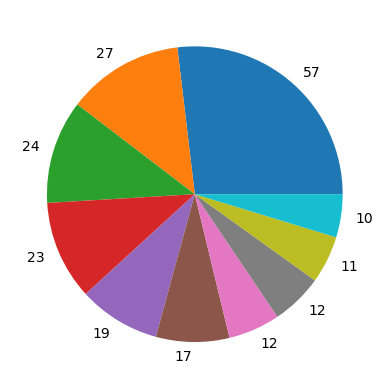

In [31]:
plt.pie(a["Company"].value_counts().head(10),labels=a["Company"].value_counts().head(10))

In [32]:
pp=a["Company"].value_counts().head(10)

In [33]:
pp_df=pd.DataFrame(data={'pp':pp.index,"count":pp.values})


In [34]:
pp_df

,pp,count
0,Coursera Project Network,57
1,IBM,27
2,Google,24
3,Johns Hopkins University,23
4,University of Michigan,19
5,DeepLearning.AI,17
6,University of Illinois at Urbana-Champaign,12
7,Duke University,12
8,University of Colorado Boulder,11
9,Microsoft,10


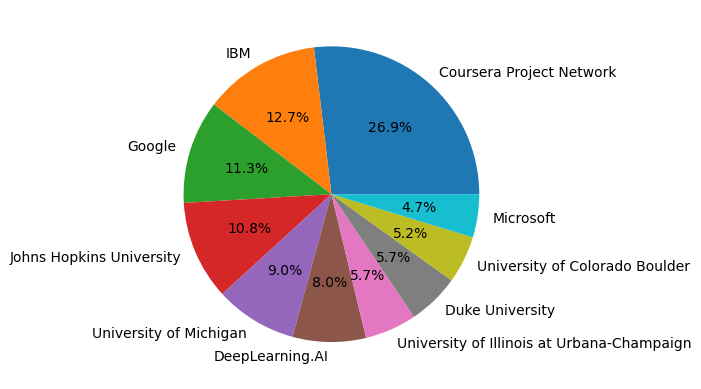

In [39]:
plt.pie(pp_df["count"],labels=pp_df["pp"],autopct="%1.1f%%")
plt.show()